# Lets manipulate the training images and their masks in order to increase our training set size
### We will try the following modification
<ol>
    <li>
        <p>Zoom into parts of the image e.g. 4 quarters</p>
    </li>
    <li>
        <p>Rotate the images (90°, 180°, 270°)</p>
    </li>
    <li>
        <p>Elastic Transformation</p>
    </li>
    <li>
        <p>Make new images of parts of images (could this work?)</p>
    </li>
</ol>

In [2]:
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

In [63]:
rnd = np.random.randint(len(X_train))
IOI = rnd

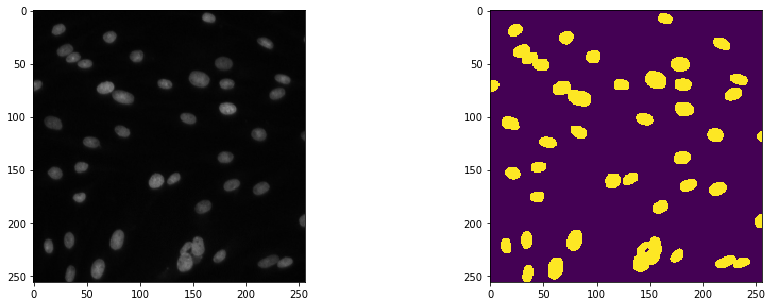

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(X_train[IOI])
plt.subplot(122)
plt.imshow(np.squeeze(y_train[IOI]))

25
25
25
25
25

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


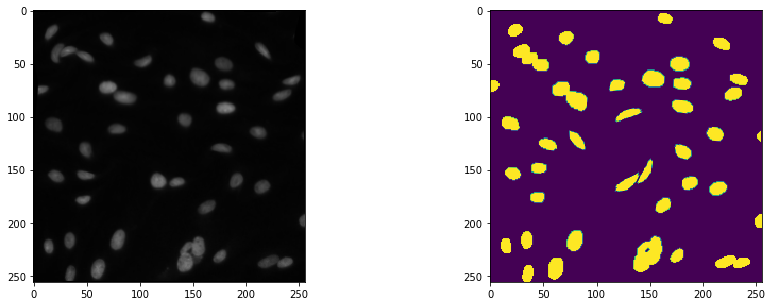

In [277]:
#swirl
"""
seems to be a little bit to heavy on the image... maybe a couple of random 
swirls with randomly distributed centers?

strenght shouldn't be to high in any case imho
"""

from skimage.transform import swirl

im = X_train[IOI]
for i in range(5):
    rndx = np.random.randint(im.shape[0])
    rndy = np.random.randint(im.shape[1])
    print(rnd)
    im = swirl(im, center=(rndx, rndy), strength=2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(im))
plt.subplot(122)
plt.imshow(np.squeeze(swirl(y_train[IOI], center=(256/2, 256/2), strength=5)))

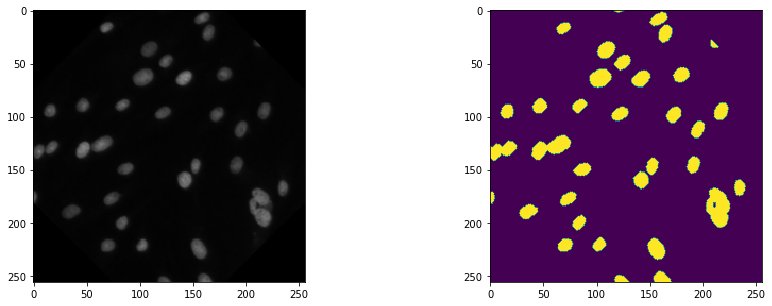

In [82]:
#rotate
"""
rotations seems to be very promising, not only rotating the image but also resizing the image which leads to even higher
diversity
"""

from skimage.transform import rotate

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(rotate(X_train[IOI], angle=45, resize=False)))
plt.subplot(122)
plt.imshow(np.squeeze(rotate(y_train[IOI], angle=45, resize=False)))

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


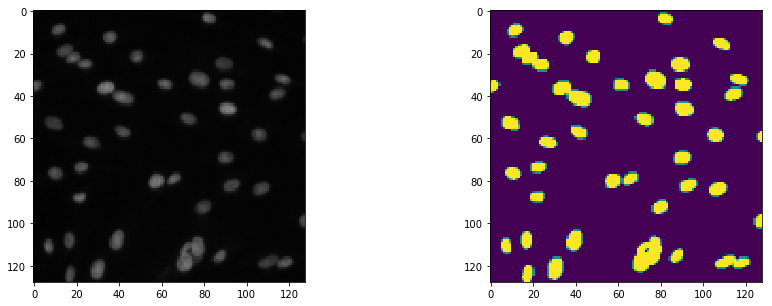

In [77]:
#rescaling
"""
seems shitty
"""

from skimage.transform import rescale

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(rescale(X_train[IOI], scale=.5)))
plt.subplot(122)
plt.imshow(np.squeeze(rescale(y_train[IOI], scale=.5)))

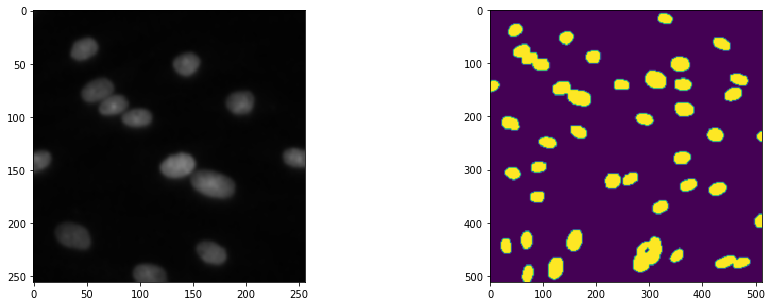

In [342]:
#rescaling
"""
seems shitty
"""

from skimage.transform import pyramid_expand
im = X_train[IOI][0:int(X_train[IOI].shape[0]/2),0:int(X_train[IOI].shape[1]/2),:]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(pyramid_expand(im, upscale=2)))
plt.subplot(122)
plt.imshow(np.squeeze(pyramid_expand(y_train[IOI], upscale=2)))

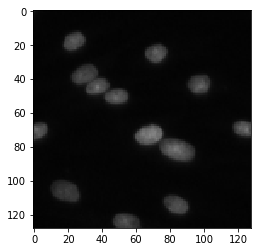

In [341]:
plt.imshow(im)

In [365]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
 
def elastic_transform(image_and_mask, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
 
 
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image_and_mask[0].shape)==2
 
    if random_state is None:
        random_state = np.random.RandomState(None)
 
    shape = image_and_mask[0].shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
 
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    trans = [map_coordinates(i, indices, order=1).reshape(shape) for i in image_and_mask]
        
    
    return trans

In [363]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
 
def elastic_transform(image_and_mask, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
 
 
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image_and_mask[0].shape)==2
 
    if random_state is None:
        random_state = np.random.RandomState(None)
 
    shape = image_and_mask[0].shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
 
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing="ij")
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    trans = [map_coordinates(i, indices, order=1).reshape(shape) for i in image_and_mask]
    
    return trans

In [366]:
t = elastic_transform([X_train[34][:,:,0], np.squeeze(y_train[34])], alpha=X_train[34].shape[1]*2, sigma=X_train[34].shape[1]*0.8)

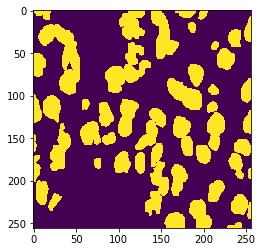

In [263]:
plt.imshow(np.squeeze(y_train[34]))

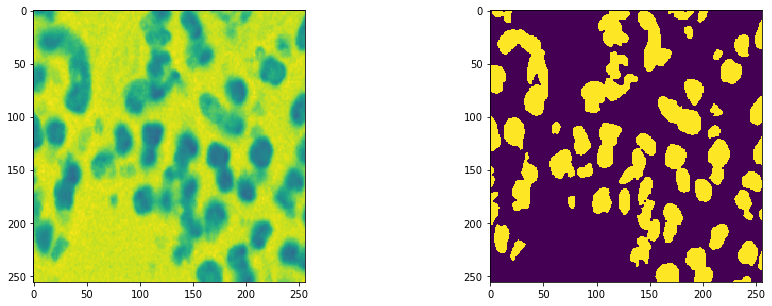

In [268]:
plt.figure(figsize=(15,5))
for j, i in enumerate(t): 
    plt.subplot(1,2,j+1)
    plt.imshow(np.squeeze(i))
    

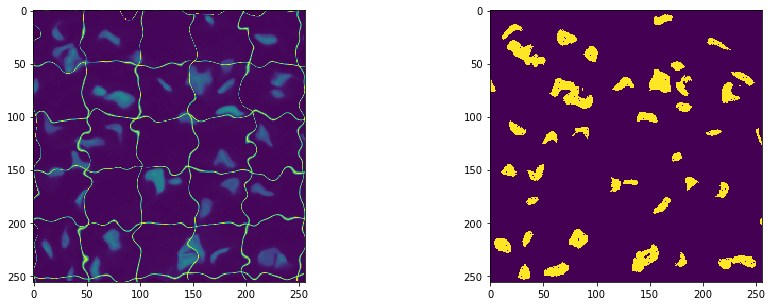

In [164]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.squeeze(elastic_transform(X_train[IOI][:,:,0], alpha=100, sigma=5)))
plt.subplot(122)
plt.imshow(np.squeeze(elastic_transform(np.squeeze(y_train[IOI]), alpha=100, sigma=5)))

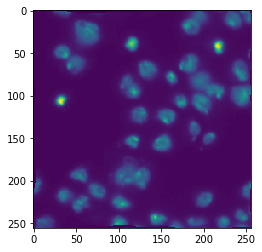

In [159]:
plt.imshow(t)

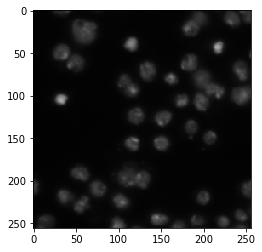

In [153]:
plt.imshow(X_train[242])

# Alrighty lets pipeline 

In [30]:
import os
import numpy as np
import matplotlib.pylab as plt
%pylab inline

from skimage.transform import swirl, rotate, pyramid_expand
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

from skimage.io import imsave

def transformation_pipeline(image_and_mask, i):   
    
        os.makedirs("Input\image_augmentation\swirl\{}".format(i))
        os.makedirs("Input\image_augmentation\swirl\{}\images".format(i))
        os.makedirs("Input\image_augmentation\swirl\{}\masks".format(i))
        x = swrl(image_and_mask)
        imsave("Input\image_augmentation\swirl\{}\images\{}.png".format(i,i), x[0])
        imsave("Input\image_augmentation\swirl\{}\masks\{}.png".format(i,i), np.squeeze(x[1]))
        
        os.makedirs(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}".format(i))
        os.makedirs(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\masks".format(i))
        os.makedirs(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\images".format(i))
        x = rotation(image_and_mask)
        for j, im in enumerate(x):
            os.makedirs(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\masks\{}".format(i,j))
            os.makedirs(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\images\{}".format(i,j))
            imsave(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\images\{}\{}.png".format(i,j,i), im[0])
            imsave(r"C:\Users\Wignand\Desktop\python\ML#\ScienceBowl2018\Input\image_augmentation\rota\{}\masks\{}\{}.png".format(i,j,i), np.squeeze(im[1]))
        
        os.makedirs("Input\image_augmentation\zoom\{}".format(i))
        os.makedirs("Input\image_augmentation\zoom\{}\masks".format(i))
        os.makedirs("Input\image_augmentation\zoom\{}\images".format(i))
        x = zoom(image_and_mask)
        for j, im in enumerate(x):
            os.makedirs("Input\image_augmentation\zoom\{}\masks\{}".format(i,j))
            os.makedirs("Input\image_augmentation\zoom\{}\images\{}".format(i,j))
            imsave("Input\image_augmentation\zoom\{}\images\{}\{}.png".format(i,j,i), im[0])
            imsave("Input\image_augmentation\zoom\{}\masks\{}\{}.png".format(i,j,i), np.squeeze(im[1]))
        
        os.makedirs("Input\image_augmentation\elastic_transformation\{}".format(i))
        os.makedirs("Input\image_augmentation\elastic_transformation\{}\masks".format(i))
        os.makedirs("Input\image_augmentation\elastic_transformation\{}\images".format(i))
        x = elastic_transform(image_and_mask, 
                              alpha=1, sigma=1)
                              #alpha=image_and_mask[0].shape[0]*1.5, sigma=image_and_mask[0].shape[0]*0.8)
        imsave("Input\image_augmentation\elastic_transformation\{}\images\{}.png".format(i,i), x[0])
        imsave("Input\image_augmentation\elastic_transformation\{}\masks\{}.png".format(i,i), np.squeeze(x[1]))        
    
    
    
def swrl(image_and_mask):
    
    transformed = []
    for im in image_and_mask:
        for i in range(5):
            rndx = np.random.randint(im.shape[0])
            rndy = np.random.randint(im.shape[1])
            im = swirl(im, center=(rndx, rndy), strength=2)
        transformed.append(im)
            
    return transformed
                
    
def rotation(image_and_mask):
    
    transformed = []
    for angle in [45,90,135,180,225,270,315]:
        temp = [rotate(im, angle=angle, resize=False) for im in image_and_mask]
        transformed.append(temp)
    
    return transformed
      
    
def zoom(image_and_mask):
    
    im = image_and_mask[0]
    m = image_and_mask[1]
    
    im1 = im[0:int(im.shape[0]/2),0:int(im.shape[1]/2),:]
    im2 = im[int(im.shape[0]/2):,int(im.shape[1]/2):,:]
    m1 = m[0:int(m.shape[0]/2),0:int(m.shape[1]/2),:]
    m2 = m[int(m.shape[0]/2):,int(m.shape[1]/2):,:]
    
    to_scale = ((im1, m1), (im2, m2))
    transformed = []
    for pair in to_scale:
        transformed.append((pyramid_expand(pair[0], upscale=2), pyramid_expand(pair[1], upscale=2)))
    
    return transformed


def elastic_transform(image_and_mask, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
 
 
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    
    image_and_mask[0] = image_and_mask[0][:,:,0]
    image_and_mask[1] = np.squeeze(image_and_mask[1])
    
    assert len(image_and_mask[0].shape)==2
 
    if random_state is None:
        random_state = np.random.RandomState(None)
 
    shape = image_and_mask[0].shape
    
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
 
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing="ij")
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    trans = [map_coordinates(i, indices, order=1).reshape(shape) for i in image_and_mask]
    
    return trans

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imsave', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [136]:
import os
import numpy as np
import matplotlib.pylab as plt
%pylab inline

from skimage.transform import swirl, rotate, pyramid_expand
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

from skimage.io import imsave
from skimage import exposure

def transformation_pipeline(image_and_mask, i):   
    
        extended = []
        image_and_mask[0] = exposure.equalize_adapthist(image_and_mask[0], clip_limit=0.03)
        #image_and_mask = [i.reshape(1,i.shape[0], i.shape[1], i.shape[2]) for i in image_and_mask]
        extended.append([image_and_mask[0], image_and_mask[1]])
        x = swrl(image_and_mask)
        x = [i.reshape(1,i.shape[0], i.shape[1], i.shape[2]) for i in x]
        #image_and_mask = [i.reshape(1,i.shape[0], i.shape[1], i.shape[2]) for i in image_and_mask]
        extended.append([x[0], x[1]])
 
        x = rotation(image_and_mask)
        for im in x:
            extended.append([im[0], im[1]])
        
        x = elastic_transform(image_and_mask, 
                              alpha=image_and_mask[0].shape[0]*1.5, sigma=image_and_mask[0].shape[0]*0.8)
        extended.append([im[0], im[1]])
        
        x = zoom(image_and_mask)
        for im in x:
            extended.append([im[0], im[1]])
        

        
        return extended 
    
    
def swrl(image_and_mask):
    
    transformed = []
    for im in image_and_mask:
        for i in range(5):
            rndx = np.random.randint(im.shape[0])
            rndy = np.random.randint(im.shape[1])
            im = swirl(im, center=(rndx, rndy), strength=2)
        transformed.append(im)
            
    return transformed
                
    
def rotation(image_and_mask):
    
    transformed = []
    for angle in [45,90,135,180,225,270,315]:
        temp = [rotate(im, angle=angle, resize=False) for im in image_and_mask]
        transformed.append(temp)
    
    return transformed
      
    
def zoom(image_and_mask):
    
    im = image_and_mask[0].copy()
    m = image_and_mask[1].copy()
    
    im1 = im[0:int(im.shape[0]/2),0:int(im.shape[1]/2),:]
    im2 = im[int(im.shape[0]/2):,int(im.shape[1]/2):,:]
    m1 = m[0:int(m.shape[0]/2),0:int(m.shape[1]/2),:]
    m2 = m[int(m.shape[0]/2):,int(m.shape[1]/2):,:]
    
    to_scale = ((im1, m1), (im2, m2))
    transformed = []
    for pair in to_scale:
        transformed.append((pyramid_expand(pair[0], upscale=2), pyramid_expand(pair[1], upscale=2)))
    
    return transformed


def elastic_transform(image_and_mask, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
 
 
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    
    image_and_mask = image_and_mask.copy()
    
    image_and_mask[0] = image_and_mask[0][:,:,0]
    image_and_mask[1] = np.squeeze(image_and_mask[1])
    
    assert len(image_and_mask[0].shape)==2
 
    if random_state is None:
        random_state = np.random.RandomState(None)
 
    shape = image_and_mask[0].shape
    
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
 
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing="ij")
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    trans = [map_coordinates(i, indices, order=1).reshape(shape) for i in image_and_mask]
    
    return trans

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imsave', 'plt', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [39]:
image_and_mask = [X_train[5], np.squeeze(y_train[5])]
image_and_mask[0] = exposure.equalize_adapthist(image_and_mask[0], clip_limit=0.03)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [52]:
t = X_train[0]
e = image_and_mask[0]
print(len(t))
print(e.shape)
test = np.append(t, e, axis=0)
print(len(test))
print(test.shape)

256
(256, 256, 3)
512
(512, 256, 3)


In [49]:
print((X_train.shape))
test=np.append(X_train, e.reshape(1,256,256,3), axis=0)
print(test.shape)

(670, 256, 256, 3)
(671, 256, 256, 3)


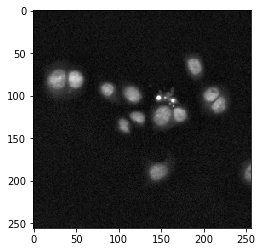

In [51]:
plt.imshow(test[670])

In [57]:
X_train[0].shape

(256, 256, 3)

In [140]:
from tqdm import tnrange, tqdm_notebook
longer = []
test = []
for i in tnrange(len(X_train)):
    image_and_mask = [X_train[i], y_train[i]]
    test.append(transformation_pipeline(image_and_mask, i))
    if i == 100:
        test = []
        longer.append(test)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:412: UserWarning: The default of `mode` in `skimage.transform.swirl` will change to `reflect` in version 0.15.
  warn('The default of `mode` in `skimage.transform.swirl` '


Exception in thread Thread-29:
Traceback (most recent call last):
  File "C:\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



MemoryError: 

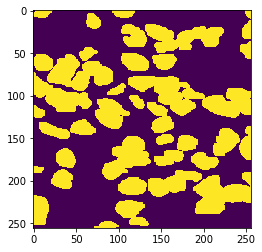

In [129]:
plt.imshow(np.squeeze((test[2][7][1])))

0